## Pandas and data processing

### Uppgift 1

In [55]:
import pandas as pd

# Alla ämnen vi vill ladda in. lägger i en lista.
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Skapa en dictionary, för att lagra dataframes för varje ämne.
dataframes_a = {}


# en funktion för att ändra kolumnnamn.
def rename_columns_a(df):
    new_columns_a = [
        "Plats",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (poäng)",
        "Flickor (poäng)",
        "Pojkar (poäng)",
    ]
    if len(df.columns) == len(new_columns_a):
        df.columns = new_columns_a
    return df


# Läs in data från varje enskild sheet och ändra namn på kolumnerna.
for subject in subjects:
    df_a = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name=subject, skiprows=8)
    df_a = rename_columns_a(df_a)
    dataframes_a[subject] = df_a

    # Konvertera Totalt poäng till numerisk typ.
    df_a["Totalt (poäng)"] = pd.to_numeric(df_a["Totalt (poäng)"], errors='coerce')
    dataframes_a[subject] = df_a

print("Allt funkar som det ska. De tillgängliga ämnena är:", ", ".join(subjects))

Allt funkar som det ska. De tillgängliga ämnena är: Engelska, Matematik, Svenska, Svenska som andraspråk


In [56]:
# Kontroll för att se till så att utskrift fungerar.


# Ändra till annat ämne för att se den specifika datan för det ämnet.
dataframes_a["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


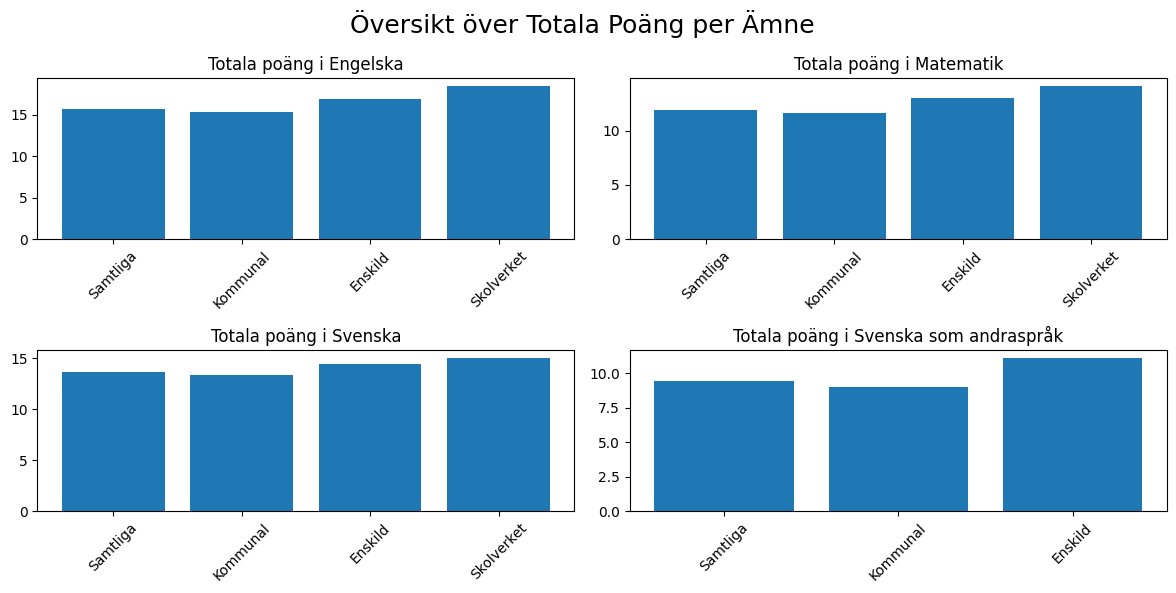

In [60]:
import matplotlib.pyplot as plt

# skapa en figur i storlek 12x6 tum.
plt.figure(figsize=(12,6))

# Loopa igenom varje ämne som är i subjects listan
for i, subject in enumerate(subjects):
    # Skapa en subplot
    plt.subplot(2, 2, i+1)
    # Hämta in dataframe för aktuella ämnet
    df_a = dataframes_a[subject]
    # Rita ett stapeldiagram med "Huvudman" på xaxeln och Totalt på yaxeln.
    plt.bar(df_a["Huvudman"], df_a["Totalt (poäng)"])
    # Huvudtitel
    plt.suptitle("Översikt över Totala Poäng per Ämne", fontsize=18)
    # Sätter titeln på varje plot till ett ämne
    plt.title(f"Totala poäng i {subject}")
    # Rotera namnen på alla staplar 45 procent så att de visas diagonalt
    plt.xticks(rotation= 45)

# Justera layouten så att inget överlappar varandra
plt.tight_layout()

# Importera "Path" från pathlib spara bilden i mappen "visualiseringar"
from pathlib import Path
output_folder = Path("visualiseringar")
plt.savefig(output_folder / "total_points_all_courses.png", dpi=300)
# Visa plot 
plt.show()


### Uppgift 2